In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_data_inputs_train = pd.read_csv("loan_data_inputs_train.csv", low_memory = False)
loan_data_targets_train = pd.read_csv("loan_data_targets_train.csv", low_memory = False)

In [3]:
loan_data_inputs_test = pd.read_csv("loan_data_inputs_test.csv", low_memory = False)
loan_data_targets_test = pd.read_csv("loan_data_targets_test.csv", low_memory = False)

In [4]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_RENT_OTHER_NONE_ANY',
'home_ownership_OWN',
'home_ownership_MORTGAGE',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'addr_state_NM_VA',
'addr_state_NY',
'addr_state_OK_TN_MO_LA_MD_NC',
'addr_state_CA',
'addr_state_UT_KY_AZ_NJ',
'addr_state_AR_MI_PA_OH_MN',
'addr_state_RI_MA_DE_SD_IN',
'addr_state_GA_WA_OR',
'addr_state_WI_MT',
'addr_state_TX',
'addr_state_IL_CT',
'addr_state_KS_SC_CO_VT_AK_MS',
'addr_state_WV_NH_WY_DC_ME_ID',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_educ__sm_b__wedd__ren_en__mov__house',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_oth__med__vacation',
'purpose_major_purch__car__home_impr',
'initial_list_status_f',
'initial_list_status_w',
'term_36',
'term_60',
'emp_length_0',
'emp_length_1',
'emp_length_2-4',
'emp_length_5-6',
'emp_length_7-9',
'emp_length_10',
'mths_since_issue_d_<38',
'mths_since_issue_d_38-39',
'mths_since_issue_d_40-41',
'mths_since_issue_d_42-48',
'mths_since_issue_d_49-52',
'mths_since_issue_d_53-64',
'mths_since_issue_d_65-84',
'mths_since_issue_d_>84',
'int_rate_<9.548',
'int_rate_9.548-12.025',
'int_rate_12.025-15.74',
'int_rate_15.74-20.281',
'int_rate_>20.281',
'mths_since_earliest_cr_line_<140',
'mths_since_earliest_cr_line_141-164',
'mths_since_earliest_cr_line_165-247',
'mths_since_earliest_cr_line_248-270',
'mths_since_earliest_cr_line_271-352',
'mths_since_earliest_cr_line_>352',
'delinq_2yrs_0',
'delinq_2yrs_1-3',
'delinq_2yrs_>=4',
'inq_last_6mths_0',
'inq_last_6mths_1-2',
'inq_last_6mths_3-6',
'inq_last_6mths_>6',
'open_acc_0',
'open_acc_1-3',
'open_acc_4-12',
'open_acc_13-17',
'open_acc_18-22',
'open_acc_23-25',
'open_acc_26-30',
'open_acc_>=31',
'pub_rec_0-2',
'pub_rec_3-4',
'pub_rec_>=5',
'total_acc_<=27',
'total_acc_28-51',
'total_acc_>=52',
'acc_now_delinq_0',
'acc_now_delinq_>=1',
'total_rev_hi_lim_<=5K',
'total_rev_hi_lim_5K-10K',
'total_rev_hi_lim_10K-20K',
'total_rev_hi_lim_20K-30K',
'total_rev_hi_lim_30K-40K',
'total_rev_hi_lim_40K-55K',
'total_rev_hi_lim_55K-95K',
'total_rev_hi_lim_>95K',
'annual_inc_<20K',
'annual_inc_20K-30K',
'annual_inc_30K-40K',
'annual_inc_40K-50K',
'annual_inc_50K-60K',
'annual_inc_60K-70K',
'annual_inc_70K-80K',
'annual_inc_80K-90K',
'annual_inc_90K-100K',
'annual_inc_100K-120K',
'annual_inc_120K-140K',
'annual_inc_>140K',
'dti_<=1.4',
'dti_1.4-3.5',
'dti_3.5-7.7',
'dti_7.7-10.5',
'dti_10.5-16.1',
'dti_16.1-20.3',
'dti_20.3-21.7',
'dti_21.7-22.4',
'dti_22.4-35',
'dti_>35',
'mths_since_last_delinq_Missing',
'mths_since_last_delinq_0-3',
'mths_since_last_delinq_4-30',
'mths_since_last_delinq_31-56',
'mths_since_last_delinq_>=57',
'mths_since_last_record_Missing',
'mths_since_last_record_0-2',
'mths_since_last_record_3-20',
'mths_since_last_record_21-31',
'mths_since_last_record_32-80',
'mths_since_last_record_81-86',
'mths_since_last_record_>=86',
]]

In [5]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade_G',
'home_ownership_RENT_OTHER_NONE_ANY',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'verification_status_Verified',
'purpose_educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status_f',
'term_60',
'emp_length_0',
'mths_since_issue_d_>84',
'int_rate_>20.281',
'mths_since_earliest_cr_line_<140',
'delinq_2yrs_>=4',
'inq_last_6mths_>6',
'open_acc_0',
'pub_rec_0-2',
'total_acc_<=27',
'acc_now_delinq_0',
'total_rev_hi_lim_<=5K',
'annual_inc_<20K',
'dti_>35',
'mths_since_last_delinq_0-3',
'mths_since_last_record_0-2']

In [6]:
inputs_train_with_ref_cat.shape

(373028, 126)

In [7]:
inputs_train = inputs_train_with_ref_cat.drop(columns = ref_categories)

In [8]:
inputs_train.shape

(373028, 104)

In [9]:
inputs_train.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,home_ownership_OWN,home_ownership_MORTGAGE,addr_state_NM_VA,addr_state_NY,...,mths_since_last_delinq_Missing,mths_since_last_delinq_4-30,mths_since_last_delinq_31-56,mths_since_last_delinq_>=57,mths_since_last_record_Missing,mths_since_last_record_3-20,mths_since_last_record_21-31,mths_since_last_record_32-80,mths_since_last_record_81-86,mths_since_last_record_>=86
0,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
1,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
2,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
3,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
4,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [10]:
# P values for sklearn logistic regression.
# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LogisticRegression_with_p_values()

In [13]:
pd.options.display.max_rows = None

In [14]:
# inputs_train.info(verbose = True,show_counts = True)

In [15]:
loan_data_targets_train.head()

,Unnamed: 0,good_bad
0,427211,1
1,206088,1
2,136020,1
3,412305,0
4,36159,0


In [17]:
reg.fit(inputs_train.astype(int), loan_data_targets_train['good_bad'])

In [18]:
feature_name = list(inputs_train)

In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = reg.coef_.T
summary_table = pd.concat([pd.DataFrame(columns = list(summary_table), data = [['Intercept',reg.intercept_[0]]]),
           summary_table], ignore_index = True)

In [20]:
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [21]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.323207,NaN
1,grade_A,0.899931,9.193862e-23
2,grade_B,0.718630,2.924634e-31
3,grade_C,0.540737,4.784270e-21
4,grade_D,0.368630,1.517809e-11
5,grade_E,0.218240,8.629787e-06
6,grade_F,0.033183,5.157056e-01
7,home_ownership_OWN,0.089140,9.905078e-06
8,home_ownership_MORTGAGE,0.108547,1.202337e-17
9,addr_state_NM_VA,0.052107,1.034497e-01


In [22]:
# removing feature groups delinq_2yrs, open_acc, pub_rec, total_rev_hi_lim, total_acc 
# since none of the variables have p values < 0.05 in this group

inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_RENT_OTHER_NONE_ANY',
'home_ownership_OWN',
'home_ownership_MORTGAGE',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'addr_state_NM_VA',
'addr_state_NY',
'addr_state_OK_TN_MO_LA_MD_NC',
'addr_state_CA',
'addr_state_UT_KY_AZ_NJ',
'addr_state_AR_MI_PA_OH_MN',
'addr_state_RI_MA_DE_SD_IN',
'addr_state_GA_WA_OR',
'addr_state_WI_MT',
'addr_state_TX',
'addr_state_IL_CT',
'addr_state_KS_SC_CO_VT_AK_MS',
'addr_state_WV_NH_WY_DC_ME_ID',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_educ__sm_b__wedd__ren_en__mov__house',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_oth__med__vacation',
'purpose_major_purch__car__home_impr',
'initial_list_status_f',
'initial_list_status_w',
'term_36',
'term_60',
'emp_length_0',
'emp_length_1',
'emp_length_2-4',
'emp_length_5-6',
'emp_length_7-9',
'emp_length_10',
'mths_since_issue_d_<38',
'mths_since_issue_d_38-39',
'mths_since_issue_d_40-41',
'mths_since_issue_d_42-48',
'mths_since_issue_d_49-52',
'mths_since_issue_d_53-64',
'mths_since_issue_d_65-84',
'mths_since_issue_d_>84',
'int_rate_<9.548',
'int_rate_9.548-12.025',
'int_rate_12.025-15.74',
'int_rate_15.74-20.281',
'int_rate_>20.281',
'mths_since_earliest_cr_line_<140',
'mths_since_earliest_cr_line_141-164',
'mths_since_earliest_cr_line_165-247',
'mths_since_earliest_cr_line_248-270',
'mths_since_earliest_cr_line_271-352',
'mths_since_earliest_cr_line_>352',
'inq_last_6mths_0',
'inq_last_6mths_1-2',
'inq_last_6mths_3-6',
'inq_last_6mths_>6',
'acc_now_delinq_0',
'acc_now_delinq_>=1',
'annual_inc_<20K',
'annual_inc_20K-30K',
'annual_inc_30K-40K',
'annual_inc_40K-50K',
'annual_inc_50K-60K',
'annual_inc_60K-70K',
'annual_inc_70K-80K',
'annual_inc_80K-90K',
'annual_inc_90K-100K',
'annual_inc_100K-120K',
'annual_inc_120K-140K',
'annual_inc_>140K',
'dti_<=1.4',
'dti_1.4-3.5',
'dti_3.5-7.7',
'dti_7.7-10.5',
'dti_10.5-16.1',
'dti_16.1-20.3',
'dti_20.3-21.7',
'dti_21.7-22.4',
'dti_22.4-35',
'dti_>35',
'mths_since_last_delinq_Missing',
'mths_since_last_delinq_0-3',
'mths_since_last_delinq_4-30',
'mths_since_last_delinq_31-56',
'mths_since_last_delinq_>=57',
'mths_since_last_record_Missing',
'mths_since_last_record_0-2',
'mths_since_last_record_3-20',
'mths_since_last_record_21-31',
'mths_since_last_record_32-80',
'mths_since_last_record_81-86',
'mths_since_last_record_>=86',
]]

In [23]:
ref_categories = ['grade_G',
'home_ownership_RENT_OTHER_NONE_ANY',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'verification_status_Verified',
'purpose_educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status_f',
'term_60',
'emp_length_0',
'mths_since_issue_d_>84',
'int_rate_>20.281',
'mths_since_earliest_cr_line_<140',
'inq_last_6mths_>6',
'acc_now_delinq_0',
'annual_inc_<20K',
'dti_>35',
'mths_since_last_delinq_0-3',
'mths_since_last_record_0-2']

In [ ]:

inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()


In [26]:
reg2.fit(inputs_train.astype(int), loan_data_targets_train['good_bad'])
feature_name = inputs_train.columns.values
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values

# Here we get the results for our final PD model.

In [27]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.285905,NaN
1,grade_A,0.891441,1.948488e-22
2,grade_B,0.679867,5.695205e-28
3,grade_C,0.492177,1.294678e-17
4,grade_D,0.316513,7.160067e-09
5,grade_E,0.156084,1.373409e-03
6,grade_F,-0.036391,4.715196e-01
7,home_ownership_OWN,0.087194,1.499082e-05
8,home_ownership_MORTGAGE,0.105221,8.697785e-17
9,addr_state_NM_VA,0.043458,1.739782e-01


In [28]:
# removing feature groups delinq_2yrs, open_acc, pub_rec, total_rev_hi_lim, total_acc 
# since none of the variables have p values < 0.05 in this group

inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_RENT_OTHER_NONE_ANY',
'home_ownership_OWN',
'home_ownership_MORTGAGE',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'addr_state_NM_VA',
'addr_state_NY',
'addr_state_OK_TN_MO_LA_MD_NC',
'addr_state_CA',
'addr_state_UT_KY_AZ_NJ',
'addr_state_AR_MI_PA_OH_MN',
'addr_state_RI_MA_DE_SD_IN',
'addr_state_GA_WA_OR',
'addr_state_WI_MT',
'addr_state_TX',
'addr_state_IL_CT',
'addr_state_KS_SC_CO_VT_AK_MS',
'addr_state_WV_NH_WY_DC_ME_ID',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_educ__sm_b__wedd__ren_en__mov__house',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_oth__med__vacation',
'purpose_major_purch__car__home_impr',
'initial_list_status_f',
'initial_list_status_w',
'term_36',
'term_60',
'emp_length_0',
'emp_length_1',
'emp_length_2-4',
'emp_length_5-6',
'emp_length_7-9',
'emp_length_10',
'mths_since_issue_d_<38',
'mths_since_issue_d_38-39',
'mths_since_issue_d_40-41',
'mths_since_issue_d_42-48',
'mths_since_issue_d_49-52',
'mths_since_issue_d_53-64',
'mths_since_issue_d_65-84',
'mths_since_issue_d_>84',
'int_rate_<9.548',
'int_rate_9.548-12.025',
'int_rate_12.025-15.74',
'int_rate_15.74-20.281',
'int_rate_>20.281',
'mths_since_earliest_cr_line_<140',
'mths_since_earliest_cr_line_141-164',
'mths_since_earliest_cr_line_165-247',
'mths_since_earliest_cr_line_248-270',
'mths_since_earliest_cr_line_271-352',
'mths_since_earliest_cr_line_>352',
'inq_last_6mths_0',
'inq_last_6mths_1-2',
'inq_last_6mths_3-6',
'inq_last_6mths_>6',
'acc_now_delinq_0',
'acc_now_delinq_>=1',
'annual_inc_<20K',
'annual_inc_20K-30K',
'annual_inc_30K-40K',
'annual_inc_40K-50K',
'annual_inc_50K-60K',
'annual_inc_60K-70K',
'annual_inc_70K-80K',
'annual_inc_80K-90K',
'annual_inc_90K-100K',
'annual_inc_100K-120K',
'annual_inc_120K-140K',
'annual_inc_>140K',
'dti_<=1.4',
'dti_1.4-3.5',
'dti_3.5-7.7',
'dti_7.7-10.5',
'dti_10.5-16.1',
'dti_16.1-20.3',
'dti_20.3-21.7',
'dti_21.7-22.4',
'dti_22.4-35',
'dti_>35',
'mths_since_last_delinq_Missing',
'mths_since_last_delinq_0-3',
'mths_since_last_delinq_4-30',
'mths_since_last_delinq_31-56',
'mths_since_last_delinq_>=57',
'mths_since_last_record_Missing',
'mths_since_last_record_0-2',
'mths_since_last_record_3-20',
'mths_since_last_record_21-31',
'mths_since_last_record_32-80',
'mths_since_last_record_81-86',
'mths_since_last_record_>=86',
]]

In [29]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,home_ownership_OWN,home_ownership_MORTGAGE,addr_state_NM_VA,addr_state_NY,...,mths_since_last_delinq_Missing,mths_since_last_delinq_4-30,mths_since_last_delinq_31-56,mths_since_last_delinq_>=57,mths_since_last_record_Missing,mths_since_last_record_3-20,mths_since_last_record_21-31,mths_since_last_record_32-80,mths_since_last_record_81-86,mths_since_last_record_>=86
0,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
1,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
2,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
3,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
4,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [30]:
yhat_test = reg2.model.predict(inputs_test)

In [31]:
yhat_test_proba = reg2.model.predict_proba(inputs_test)

In [32]:
yhat_test_proba

array([[0.08693415, 0.91306585],
       [0.13841451, 0.86158549],
       [0.11428387, 0.88571613],
       ...,
       [0.02596659, 0.97403341],
       [0.03868925, 0.96131075],
       [0.04603476, 0.95396524]], shape=(93257, 2))

In [33]:
#selecting only the second values 1 - prob of default
yhat_test_proba = yhat_test_proba[:][:,1]

# Accuracy

In [34]:
tr = 0.5

In [35]:
yhat_test = np.where(yhat_test_proba > tr, 1, 0 )

In [36]:
loan_data_targets_test.head()

,good_bad
0,1
1,1
2,1
3,1
4,1


In [37]:
pd.crosstab(loan_data_targets_test['good_bad'], yhat_test, rownames = ['Actual'], colnames = ['Predicted'] )

Predicted,0,1
Actual,,
0,1,10189
1,0,83067


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

In [39]:
fpr, tpr, thresholds = roc_curve(loan_data_targets_test['good_bad'], yhat_test_proba)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

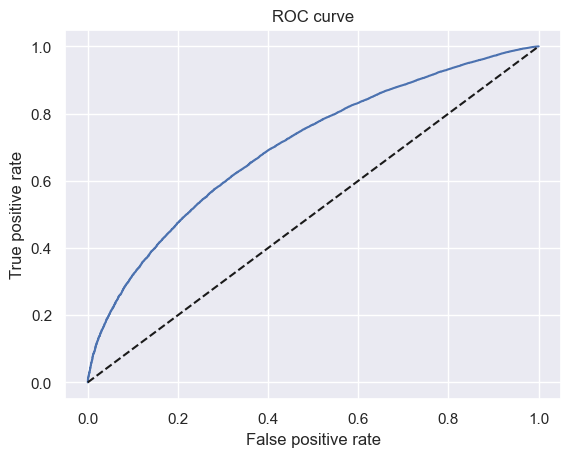

In [41]:
plt.plot(fpr,tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [42]:
AUROC = roc_auc_score(loan_data_targets_test['good_bad'], yhat_test_proba)
AUROC

np.float64(0.701582865117583)

# Gini and Kolmogorov smirnov Coefficients

In [43]:
df = pd.DataFrame()
df['y'] =  loan_data_targets_test['good_bad']
df['yhat'] = yhat_test
df['yhat_proba'] = yhat_test_proba
df = df.sort_values('yhat_proba').reset_index(drop = False)

In [44]:
df['Cumulative N Population'] = df.index + 1
df['Cumulative N Good'] = df['y'].cumsum()
df['Cumulative N Bad'] = df['Cumulative N Population'] - df['Cumulative N Good']

In [45]:
df.head(20)

,index,y,yhat,yhat_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,64110,0,0,0.492494,1,0,1
1,2051,0,1,0.501254,2,0,2
2,50505,1,1,0.509188,3,1,2
3,81256,1,1,0.517715,4,2,2
4,33698,1,1,0.520383,5,3,2
5,64010,0,1,0.522752,6,3,3
6,61051,1,1,0.523108,7,4,3
7,12600,1,1,0.524661,8,5,3
8,12569,1,1,0.527010,9,6,3
9,49722,1,1,0.528817,10,7,3


In [46]:
df['Cumulative Perc Population'] = df['Cumulative N Population']/df.shape[0]
df['Cumulative Perc Good'] = df['Cumulative N Good']/df['y'].sum()
df['Cumulative Perc Bad'] = df['Cumulative N Bad']/(df.shape[0] - df['y'].sum())

In [47]:
df.head()

,index,y,yhat,yhat_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,64110,0,0,0.492494,1,0,1,0.000011,0.000000,0.000098
1,2051,0,1,0.501254,2,0,2,0.000021,0.000000,0.000196
2,50505,1,1,0.509188,3,1,2,0.000032,0.000012,0.000196
3,81256,1,1,0.517715,4,2,2,0.000043,0.000024,0.000196
4,33698,1,1,0.520383,5,3,2,0.000054,0.000036,0.000196


Text(0.5, 1.0, 'Gini')

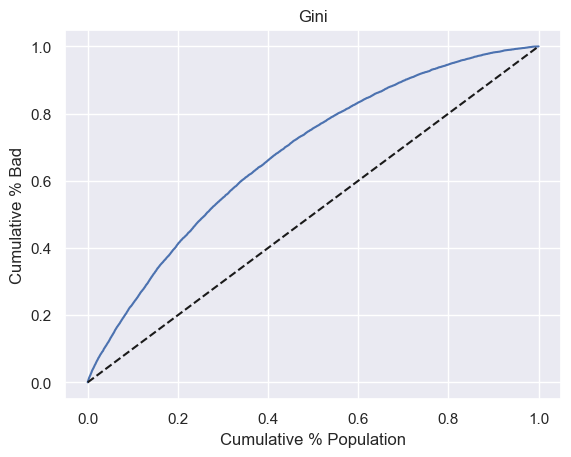

In [48]:
#Gini
plt.plot(df['Cumulative Perc Population'], df['Cumulative Perc Bad'])
plt.plot(df['Cumulative Perc Population'], df['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [49]:
Gini = AUROC * 2 - 1
Gini

np.float64(0.4031657302351661)

# The model is good since the gini score is greater than zero

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

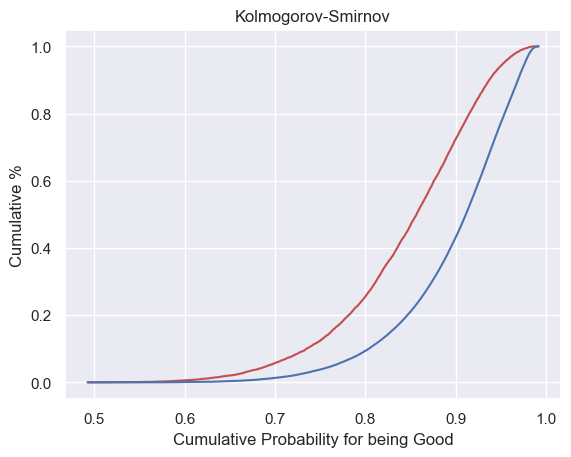

In [50]:
#Kolmogorov Smirnov
plt.plot(df['yhat_proba'], df['Cumulative Perc Bad'], color = 'r')
plt.plot(df['yhat_proba'], df['Cumulative Perc Good'], color = 'b')
plt.xlabel('Cumulative Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [51]:
KS = max(abs(df['Cumulative Perc Good'] - df['Cumulative Perc Bad']))
KS

0.2948520373961107

# The model is good since its KS value is greater than zero

# Creating a Score Card

In [52]:
df_ref_categories = pd.DataFrame(data = ref_categories, columns = ['Feature name'])

In [53]:
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

In [54]:
df_scorecard = pd.concat([summary_table, df_ref_categories], axis = 0).reset_index(drop = True)

In [55]:
df_scorecard['Original feature name'] = ""

In [56]:
original_features = list(pd.read_csv("3.1 loan_data_2007_2014.csv", low_memory = False,index_col = 'Unnamed: 0')) + ['mths_since_earliest_cr_line',
                                                                                                                     'mths_since_issue_d']

In [57]:
def longest_prefix_match(val, string_lst):
    match_lst = [str_val for str_val in string_lst if val.startswith(str_val)]
    return max(match_lst, key = len) if match_lst else None

In [58]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].apply(lambda x: longest_prefix_match(x,original_features))

In [59]:
min_score = 300
max_score = 850

In [60]:
df_scorecard.loc[df_scorecard['Feature name'] == 'Intercept','Original feature name' ] = 'Intercept'

In [61]:
df_scorecard.groupby(['Original feature name'])['Coefficients'].min()

Original feature name
Intercept                     -0.285905
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.192157
dti                           -0.139808
emp_length                     0.000000
grade                         -0.036391
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -0.075846
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.007261
mths_since_last_delinq         0.000000
mths_since_last_record        -0.085117
purpose                        0.000000
term                           0.000000
verification_status           -0.009233
Name: Coefficients, dtype: float64

In [62]:
min_sum_coef = df_scorecard.groupby(['Original feature name'])['Coefficients'].min().sum()
max_sum_coef = df_scorecard.groupby(['Original feature name'])['Coefficients'].max().sum()

In [63]:
min_sum_coef,max_sum_coef

(np.float64(-0.8317194129356756), np.float64(5.537497002030366))

In [64]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score)/(max_sum_coef - min_sum_coef)

In [65]:
df_scorecard['Score - Preliminary'] = round(df_scorecard['Score - Calculation'], 0)

In [66]:
intercept_score = ((df_scorecard.loc[df_scorecard['Feature name'] == 'Intercept','Coefficients'] - min_sum_coef)/\
    (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

In [67]:
intercept_score

0    347.132619
Name: Coefficients, dtype: float64

In [68]:
df_scorecard.loc[df_scorecard['Feature name'] == 'Intercept','Score - Calculation'] = intercept_score

In [69]:
df_scorecard.loc[df_scorecard['Feature name'] == 'Intercept','Score - Preliminary'] = round(intercept_score,0)

In [70]:
min_sum_score_prel = df_scorecard.groupby(['Original feature name'])['Score - Preliminary'].min().sum()

In [71]:
max_sum_score_prel = df_scorecard.groupby(['Original feature name'])['Score - Preliminary'].max().sum()

In [72]:
min_sum_score_prel, max_sum_score_prel

(np.float64(299.0), np.float64(850.0))

In [75]:
reg2

In [77]:
import pickle

In [78]:
pickle.dump(reg2.model, open('pd_model.sav','wb'))